In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #This guy removes warnings

In [2]:
dtf = pd.read_csv('Data_for_UCI_named.csv')

In [4]:
dtf['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [3]:
dtf.isna().sum()

dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
dtf = dtf.drop(['stab'], axis=1)


In [6]:
X = dtf.drop(columns=['stabf'])
Y = dtf['stabf']

In [7]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

In [8]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [9]:
# Now to balancing the classes. This is done to the train data only.
import imblearn
from imblearn.over_sampling import SMOTE

In [10]:
smote = SMOTE(random_state=1)
x_balanced, y_balanced = smote.fit_sample(x_train, y_train)

In [12]:
#now we have a balanced dataset,to check,
x_train.shape, x_balanced.shape

((8000, 12), (10184, 12))

In [13]:
y_train.shape, y_balanced.shape

((8000,), (10184,))

In [14]:
pd.Series(y_balanced.tolist()).value_counts()

unstable    5092
stable      5092
dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler


In [16]:
scaler = MinMaxScaler() 
normalized_train = scaler.fit_transform(x_balanced) #using scalar on the train data
normalized_test = scaler.transform(x_test)

In [18]:
#we want them as dataframes with the line below
normalized_train = pd.DataFrame(normalized_train)

In [19]:
normalized_test = pd.DataFrame(normalized_test)

In [20]:
normalized_train.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.605895,0.214898,0.686826,0.945002,0.454782,0.516700,0.874552,0.255448,0.545528,0.598331,0.669360,0.642234
1,0.481097,0.525305,0.797470,0.027436,0.616162,0.479547,0.065178,0.641255,0.414248,0.049680,0.912824,0.083403
2,0.075724,0.874245,0.355155,0.835240,0.474432,0.640493,0.697645,0.252484,0.903588,0.919622,0.198830,0.642306
3,0.736693,0.652439,0.873580,0.171161,0.362461,0.278625,0.940452,0.691134,0.221930,0.893734,0.963154,0.579607
4,0.692014,0.088023,0.589553,0.764197,0.220544,0.718310,0.911640,0.685474,0.983833,0.701163,0.828559,0.121206
5,0.841058,0.000744,0.823204,0.051215,0.399379,0.979828,0.268636,0.556469,0.788209,0.735471,0.029041,0.975019
6,0.949093,0.786564,0.461315,0.789597,0.394688,0.745914,0.405648,0.666724,0.139264,0.187933,0.010989,0.562801
7,0.839301,0.016476,0.159799,0.212734,0.500281,0.488895,0.632927,0.394979,0.401137,0.153403,0.630950,0.810078
8,0.455192,0.244438,0.391380,0.947911,0.817495,0.078118,0.302400,0.230640,0.665037,0.157504,0.523852,0.710637
9,0.804835,0.668408,0.247985,0.751894,0.613105,0.688000,0.115533,0.391213,0.950579,0.044396,0.113866,0.273623


In [22]:
normalized_test.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.671365,0.380367,0.932340,0.821112,0.577835,0.068198,0.272932,0.954195,0.238500,0.837447,0.065691,0.813278
1,0.558188,0.607557,0.445405,0.349467,0.466385,0.193555,0.621676,0.798284,0.028968,0.385755,0.908498,0.854065
2,0.188048,0.408938,0.245239,0.504652,0.339393,0.531448,0.732018,0.712638,0.920287,0.084360,0.688470,0.014509
3,0.475764,0.179892,0.606958,0.008257,0.639912,0.026362,0.616975,0.474772,0.523093,0.016780,0.397283,0.804946
4,0.752247,0.914666,0.524646,0.993199,0.479150,0.496922,0.443090,0.637113,0.538482,0.075332,0.776320,0.263485
5,0.367380,0.182863,0.880609,0.204729,0.630031,0.062436,0.240694,0.843188,0.858622,0.054766,0.026677,0.379814
6,0.282216,0.987846,0.442622,0.749859,0.523287,0.471323,0.016242,0.963547,0.290968,0.932047,0.128253,0.665579
7,0.061770,0.747826,0.738254,0.561700,0.394483,0.448693,0.592068,0.778058,0.735890,0.585056,0.831313,0.123828
8,0.279011,0.435495,0.578258,0.839119,0.094441,0.825040,0.880613,0.969781,0.913312,0.473574,0.487675,0.128482
9,0.210660,0.272264,0.736220,0.176605,0.521946,0.694007,0.637163,0.123823,0.476920,0.060801,0.509959,0.324046


# RandomForest Algorithm

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(normalized_train, y_balanced)
Rand_Forest_pred = rfc.predict(normalized_test)

# EXTRA TREE FOREST

In [25]:
from sklearn.ensemble import ExtraTreesClassifier


In [26]:
extra_tree = ExtraTreesClassifier(random_state=1)
extra_tree.fit(normalized_train, y_balanced)
extraTree_pred = extra_tree.predict(normalized_test)

# XTRA GRADIENT BOOST 

In [27]:
from xgboost import XGBClassifier

In [28]:
XGB = XGBClassifier(random_state=1)
XGB.fit(normalized_train, y_balanced)
XGB_pred = XGB.predict(normalized_test)

# LIGHT GRADIENT BOOST CLASSIFIER

In [29]:
from lightgbm import LGBMClassifier

In [30]:
LGBM = LGBMClassifier(objective='binary', random_state=1)
LGBM.fit(normalized_train, y_balanced)
LGBM_pred = LGBM.predict(normalized_test)


# IMPROVING THE EXTRA TREES CLASSIFIER

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
n_estimators = [50,100,300,500,1000]
min_samples_split = [2,3,5,7,9]
min_samples_leaf = [1,2,4,6,8]
max_features = ['auto', 'sqrt','log2',None]
hyperparam_grid = {'n_estimators': n_estimators, 'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf, 'max_features': max_features}

xtra_random = RandomizedSearchCV(estimator=extra_tree, cv=5, n_iter=10, n_jobs=-1, verbose=1, scoring='accuracy',
                                 param_distributions=hyperparam_grid, random_state=1)

In [40]:
#fit the random search model
xtra_random.fit(normalized_train, y_balanced)
new_xtra_pred = xtra_random.predict(normalized_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


In [34]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

# ACCURACIES OF THE MODELS

In [41]:
accuracy = accuracy_score(y_test, Rand_Forest_pred)
print( 'Accuracy for Random Forest model: {}' .format(round(accuracy* 100 ), 2 ))

accuracy = accuracy_score(y_test, new_xtra_pred)
print( 'Accuracy for improved Extra Trees model: {}' .format(round(accuracy* 100 ), 2 ))

accuracy = accuracy_score(y_test, XGB_pred)
print( 'Accuracy for XGBoost model: {}' .format(round(accuracy* 100 ), 2 ))

accuracy = accuracy_score(y_test, LGBM_pred)
print( 'Accuracy for Light Gradient Boost model: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy for Random Forest model: 92.0
Accuracy for improved Extra Trees model: 92.0
Accuracy for XGBoost model: 94.0
Accuracy for Light Gradient Boost model: 93.0


# PRECISION

In [36]:
precision = precision_score(y_test, Rand_Forest_pred, pos_label='unstable')
print( 'Precision for Random Forest model: {}' .format(round(precision* 100 ), 2 ))

precision = precision_score(y_test, new_xtra_pred, pos_label='unstable')
print( 'Precision for improved Extra Trees model: {}' .format(round(precision* 100 ), 2 ))

precision = precision_score(y_test, XGB_pred, pos_label='stable')
print( 'Precision for XGBoost model: {}' .format(round(precision* 100 ), 2 ))

precision = precision_score(y_test, LGBM_pred, pos_label='stable')
print( 'Precision for Light Gradient Boost model: {}' .format(round(precision* 100 ), 2 ))



Precision for Random Forest model: 95.0
Precision for improved Extra Trees model: 95.0
Precision for XGBoost model: 90.0
Precision for Light Gradient Boost model: 89.0


# RECALL SCORES

In [37]:
recall = recall_score(y_test, Rand_Forest_pred, pos_label='unstable')
print( 'Recall for Random Forest model: {}' .format(round(recall* 100 ), 2 ))

recall = recall_score(y_test, new_xtra_pred, pos_label='stable')
print( 'Recall for improved Extra Trees model: {}' .format(round(recall* 100 ), 2 ))

recall = recall_score(y_test, XGB_pred, pos_label='unstable')
print( 'Recall for XGBoost model: {}' .format(round(recall* 100 ), 2 ))

recall = recall_score(y_test, LGBM_pred, pos_label='stable')
print( 'Recall for Light Gradient Boost model: {}' .format(round(recall* 100 ), 2 ))


Recall for Random Forest model: 92.0
Recall for improved Extra Trees model: 91.0
Recall for XGBoost model: 94.0
Recall for Light Gradient Boost model: 92.0


# F1 SCORES

In [38]:
f1 = f1_score(y_test, Rand_Forest_pred, pos_label='unstable')
print( 'F1 for Random Forest model: {}' .format(round(f1* 100 ), 2 ))

f1 = f1_score(y_test, Rand_Forest_pred, pos_label='unstable')
print( 'F1 for improved Extra Trees model: {}' .format(round(f1* 100 ), 2 ))

f1 = f1_score(y_test, Rand_Forest_pred, pos_label='unstable')
print( 'F1 for XGBoost model: {}' .format(round(f1* 100 ), 2 ))

f1 = f1_score(y_test, Rand_Forest_pred, pos_label='unstable')
print( 'F1 for Light Gradient Boost model: {}' .format(round(f1* 100 ), 2 ))

F1 for Random Forest model: 94.0
F1 for improved Extra Trees model: 94.0
F1 for XGBoost model: 94.0
F1 for Light Gradient Boost model: 94.0


## FEATURE IMPORTANCE 

In [43]:
accuracy = accuracy_score(y_test, extraTree_pred)
print( 'Accuracy for improved Extra Trees model: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy for improved Extra Trees model: 92.0


In [44]:
feat_imp = extra_tree.feature_importances_

### visualizing the results

In [46]:
import matplotlib.pyplot as plt

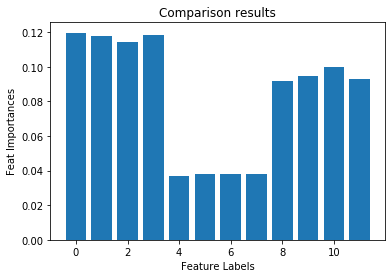

In [47]:
plt.bar(normalized_train.columns, feat_imp)
plt.xlabel('Feature Labels')
plt.ylabel('Feat Importances')
plt.title('Comparison results')
plt.show()